In [2]:
# KNN for REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns  # another package for ploting

In [3]:
#Loading the dataset

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.head() # To check the dataset

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
 # adding the columns names
    
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight", "Viscera weight",
         "Shell weight", "Rings" ]

 # Drop the sex column as we will not use it
abalone = abalone.drop("Sex", axis=1)


In [5]:
abalone.head() # To check the dataset

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: >

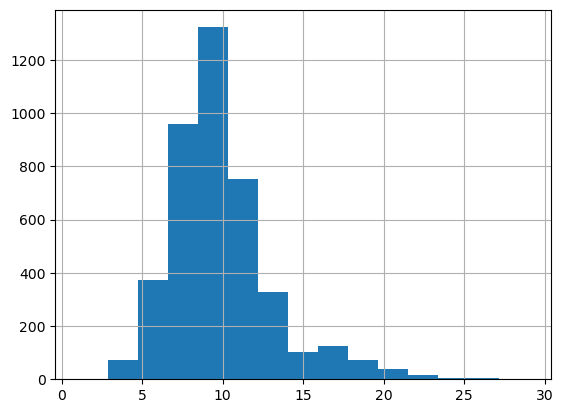

In [10]:
 #Descriptive Statistics of the dataset
 # Statistical Analysis

import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)


In [9]:
#  Checking the correlation of rings with other variables. A strong correlation between the independent and the goal variable will be a good sign.

correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [12]:
#  Fitting a KKN Model; We will use this model to predict the age (by using the  number of rings) of the Abalone using the other physical features

X = abalone.drop("Rings", axis=1) # feature set
X = X.values
y = abalone["Rings"] # Label
y = y.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
knn_model = KNeighborsRegressor(n_neighbors=3) # KNN with K=3
knn_model.fit(X_train, y_train) # Fitting the model


KNeighborsRegressor(n_neighbors=3)

In [14]:
test_preds = knn_model.predict(X_test) #Making predictions
mse = mean_squared_error(y_test, test_preds) # Getting the error
rmse = sqrt(mse)

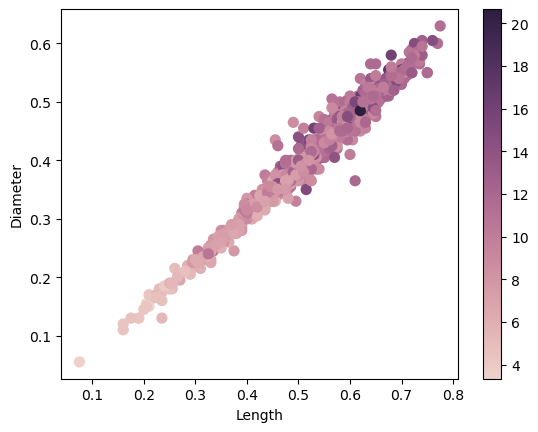

In [15]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap) # Using length and diameter
f.colorbar(points)
plt.xlabel('Length') 
plt.ylabel('Diameter') 
plt.show()